# Analyse en Facteurs principaux

In [1]:
# Chargement des librairies
import numpy as np
import pandas as pd
from plydata import *
import matplotlib.pyplot as plt
from scientisttools.decomposition import EFA
from scientisttools.graphics import plot_eigenvalues,plotEFA
from scientisttools.summarise import summaryEFA

c:\Users\duver\AppData\Local\Programs\Python\Python310\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
c:\Users\duver\AppData\Local\Programs\Python\Python310\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
# Chargement des données
D = pd.read_excel("Data_Methodes_Factorielles.xlsx",sheet_name="AUTOS_AFP",index_col=0)
display(D >> head(6))

,CYL,PUISS,LONG,LARG,POIDS,VMAX,RND1,RND2,RND3,RND4,RND5,RND6
Modele,,,,,,,,,,,,
Alfasud TI,1350,79,393,161,870,165,1.029,0.109,0.267,-0.949,0.053,-1.144
Audi 100,1588,85,468,177,1110,160,0.379,0.367,-1.054,0.106,1.316,1.632
Simca 1300,1294,68,424,168,1050,152,-0.346,0.737,-0.056,-0.430,0.274,1.044
Citroen GS Club,1222,59,412,161,930,151,0.849,0.494,-0.320,0.729,0.637,0.793
Fiat 132,1585,98,439,164,1105,165,-1.425,-0.210,0.535,-0.200,-1.983,0.832
Lancia Beta,1297,82,429,169,1080,160,0.890,0.071,-1.308,-0.971,-0.131,-1.134


In [3]:
# Instanciation
my_efa = EFA(normalize=True,
            n_components=None,
            row_labels=D.index,
            col_labels=D.columns,
            method="principal",
            row_sup_labels=None,
            quanti_sup_labels=None,
            quali_sup_labels=None,
            graph=False,
            figsize=None)
my_efa.fit(D)

c:\Users\duver\factoranalysis\scientisttools\decomposition\efa.py:186: RuntimeWarning: invalid value encountered in sqrt
  col_coord = eigen_vector*np.sqrt(eigen_value)


EFA(col_labels=Index(['CYL', 'PUISS', 'LONG', 'LARG', 'POIDS', 'VMAX', 'RND1', 'RND2', 'RND3',
       'RND4', 'RND5', 'RND6'],
      dtype='object'),
    graph=False,
    row_labels=Index(['Alfasud TI', 'Audi 100', 'Simca 1300', 'Citroen GS Club', 'Fiat 132',
       'Lancia Beta', 'Peugeot 504', 'Renault 16 TL', 'Renault 30',
       'Toyota Corolla', 'Alfetta 1.66', 'Princess 1800', 'Datsun 200L',
       'Taunus 2000', 'Rancho', 'Mazda 9295', 'Opel Rekord', 'Lada 1300'],
      dtype='object', name='Modele'))

### Correlation matrix

In [4]:
np.arange(1,2+1)

array([1, 2])

In [5]:
# Matrice des corrélations
my_efa.correlation_matrix_

,CYL,PUISS,LONG,LARG,POIDS,VMAX,RND1,RND2,RND3,RND4,RND5,RND6
CYL,1.000000,0.796628,0.701462,0.629757,0.788952,0.664934,-0.282458,0.235575,-0.059791,0.566765,-0.549617,-0.126223
PUISS,0.796628,1.000000,0.641362,0.520832,0.765293,0.844379,-0.377348,0.348786,-0.108438,0.431745,-0.576086,0.071292
LONG,0.701462,0.641362,1.000000,0.849266,0.868090,0.475928,-0.288895,0.218247,-0.013946,0.308515,-0.481575,0.308955
LARG,0.629757,0.520832,0.849266,1.000000,0.716874,0.472945,-0.190303,0.245769,-0.192400,0.483533,-0.261919,0.110979
POIDS,0.788952,0.765293,0.868090,0.716874,1.000000,0.477596,-0.355129,0.274051,-0.012082,0.352751,-0.618620,0.093659
VMAX,0.664934,0.844379,0.475928,0.472945,0.477596,1.000000,-0.313810,0.265883,-0.193767,0.375915,-0.453435,0.111810
RND1,-0.282458,-0.377348,-0.288895,-0.190303,-0.355129,-0.313810,1.000000,-0.440786,0.021014,-0.176500,0.371941,-0.020128
RND2,0.235575,0.348786,0.218247,0.245769,0.274051,0.265883,-0.440786,1.000000,0.083100,0.428733,-0.248758,0.012274
RND3,-0.059791,-0.108438,-0.013946,-0.192400,-0.012082,-0.193767,0.021014,0.083100,1.000000,-0.027545,-0.383219,-0.018782
RND4,0.566765,0.431745,0.308515,0.483533,0.352751,0.375915,-0.176500,0.428733,-0.027545,1.000000,-0.139412,-0.241340


In [6]:
# Communalités initiales
pd.DataFrame(my_efa.initial_communality_,index=D.columns,columns=["initial"])

,initial
CYL,0.843053
PUISS,0.922937
LONG,0.925902
LARG,0.879876
POIDS,0.923971
VMAX,0.882288
RND1,0.336690
RND2,0.394369
RND3,0.450844
RND4,0.610068


In [7]:
# Inertie totale
my_efa.inertia_

8.364373071752011

In [8]:
# Valeur propres
pd.DataFrame(my_efa.eig_.T,columns=["eigenvalue","difference","proportion","cumulative"],index=my_efa.dim_index_)

,eigenvalue,difference,proportion,cumulative
Dim.1,5.229521,4.218050,62.521371,62.521371
Dim.2,1.011471,0.035886,12.092609,74.613980
Dim.3,0.975585,0.252347,11.663576,86.277556
Dim.4,0.723238,0.184633,8.646650,94.924207
Dim.5,0.538606,0.275195,6.439281,101.363488
Dim.6,0.263410,0.167558,3.149191,104.512679
Dim.7,0.095852,0.089953,1.145956,105.658635
Dim.8,0.005899,0.049727,0.070530,105.729165


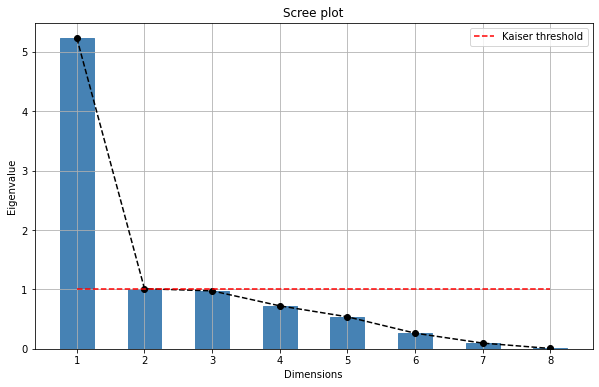

In [9]:
fig, axe = plt.subplots(figsize=(10,6))
plot_eigenvalues(my_efa,choice="eigenvalue",add_kaiser=True,ax=axe)

In [10]:
# Broken stick
my_efa.broken_stick_threshold_

array([3.10321068, 2.10321068, 1.60321068, 1.26987734, 1.01987734,
       0.81987734, 0.65321068, 0.51035354])

In [11]:
# Coordonnées des variables
pd.DataFrame(my_efa.col_coord_,index=D.columns)

,0,1,2,3,4,5,6,7
CYL,0.874463,-0.084990,0.152994,-0.088167,0.264709,-0.004500,-0.038756,-0.045990
PUISS,0.893121,-0.117049,0.063503,0.311513,0.089056,0.027141,-0.136213,0.030580
LONG,0.850778,0.367295,-0.265757,-0.169450,-0.040122,-0.032241,0.005522,-0.027719
LARG,0.768420,0.423811,0.125322,-0.273809,-0.087620,-0.086367,0.144601,0.030604
POIDS,0.894371,0.094914,-0.204898,-0.169556,0.095826,0.225432,-0.084302,0.022486
VMAX,0.749973,-0.058408,0.189538,0.504833,0.063120,-0.177884,0.108603,0.000249
RND1,-0.414234,0.231072,0.055922,-0.102837,0.317637,-0.236208,-0.085191,0.020099
RND2,0.391899,-0.284307,0.090675,-0.040309,-0.480103,0.019038,-0.025142,0.003468
RND3,-0.046057,-0.417174,-0.443544,-0.251489,0.003919,-0.247458,-0.020835,0.007888
RND4,0.524426,-0.181777,0.469907,-0.269048,-0.145371,-0.177666,-0.087434,-0.004061


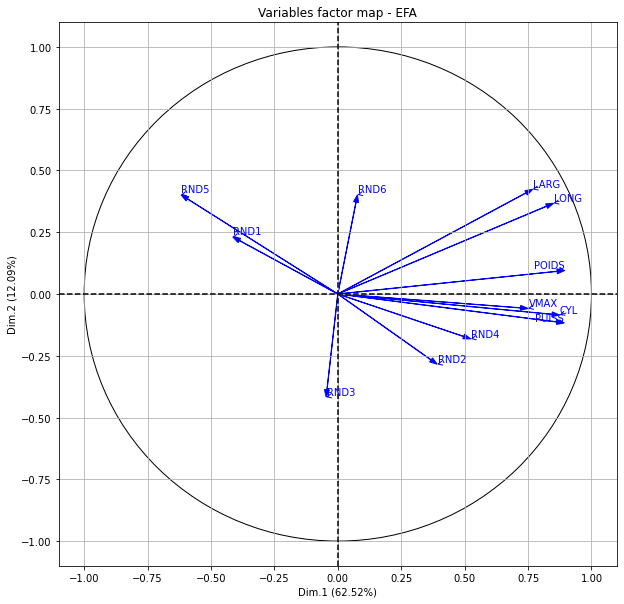

In [12]:
fig, axe = plt.subplots(figsize=(10,10))
plotEFA(my_efa,choice="var",repel=True,ax=axe)

In [13]:
# Variance restituée
my_efa.explained_variance_

array([5.22952071, 1.01147097, 0.97558499, 0.7232381 , 0.53860551,
       0.26341008, 0.09585205, 0.00589936])

In [14]:
# Communalités estimées
pd.DataFrame(my_efa.estimated_communality_,index=D.columns,columns=["estimated"])

,estimated
CYL,0.876798
PUISS,0.940594
LONG,0.961517
LARG,0.897745
POIDS,0.947255
VMAX,0.904074
RND1,0.403035
RND2,0.475767
RND3,0.497881
RND4,0.661624


In [15]:
# Qualité de la représentation des variables
pd.DataFrame(my_efa.percentage_variance_,index=D.columns,columns=["% var."])

,% var.
CYL,1.040027
PUISS,1.019131
LONG,1.038466
LARG,1.020308
POIDS,1.025200
VMAX,1.024693
RND1,1.197050
RND2,1.206402
RND3,1.104331
RND4,1.084509


In [16]:
# Factor scores
pd.DataFrame(my_efa.factor_score_,index=D.columns)

,0,1,2,3,4,5,6,7
CYL,0.098976,-0.257383,0.614904,-0.358634,0.724245,-0.120129,-0.054561,-0.212714
PUISS,0.200054,-0.268495,0.502700,0.472290,-0.075685,-0.242808,-1.114154,0.358805
LONG,0.217457,0.737828,-1.241743,0.092864,-0.482853,-0.644497,-0.115430,-0.556340
LARG,0.101000,0.188740,0.943707,-0.460943,-0.028095,-0.229901,0.418312,0.439364
POIDS,0.240592,0.041291,-0.402047,-0.211347,0.309958,1.405726,0.086877,0.173584
VMAX,0.190469,0.152789,-0.213810,0.706092,0.066309,-0.078366,0.826305,-0.153091
RND1,-0.035438,0.128374,-0.093124,-0.027899,0.255338,-0.221107,-0.106449,0.007036
RND2,0.054243,-0.146876,-0.000456,-0.044169,-0.367213,0.040489,0.029128,-0.054381
RND3,0.027593,-0.218099,-0.085709,-0.137419,0.060197,-0.249791,-0.021864,0.079094
RND4,0.068207,-0.151815,0.085991,-0.213755,-0.318784,-0.217308,-0.201675,-0.046797


In [17]:
# Contribution des variables par facteurs
pd.DataFrame(my_efa.col_contrib_,index=D.columns)

,0,1,2,3,4,5,6,7
CYL,0.045914,0.064073,1.100442e-01,0.106566,0.442845,0.005249,0.001298,0.060763
PUISS,0.187575,0.069725,7.354775e-02,0.184813,0.004836,0.021444,0.541260,0.172888
LONG,0.221630,0.526533,4.487613e-01,0.007145,0.196839,0.151085,0.005810,0.415649
LARG,0.047810,0.034454,2.591951e-01,0.176039,0.000666,0.019225,0.076298,0.259236
POIDS,0.271297,0.001649,4.704411e-02,0.037009,0.081112,0.718756,0.003291,0.040464
VMAX,0.170033,0.022579,1.330483e-02,0.413083,0.003712,0.002234,0.297712,0.031474
RND1,0.005886,0.015939,2.523934e-03,0.000645,0.055044,0.017782,0.004941,0.000066
RND2,0.013790,0.020865,6.044163e-08,0.001616,0.113846,0.000596,0.000370,0.003971
RND3,0.003568,0.046007,2.138003e-03,0.015646,0.003059,0.022695,0.000208,0.008401
RND4,0.021804,0.022292,2.152060e-03,0.037857,0.085797,0.017176,0.017735,0.002941


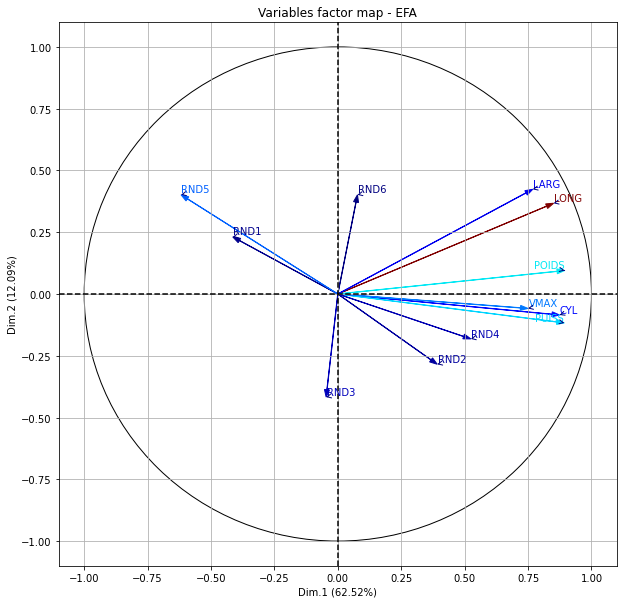

In [18]:
fig, axe = plt.subplots(figsize=(10,10))
plotEFA(my_efa,choice="var",color="contrib",repel=True,ax=axe)

In [19]:
#Fidelité des facteurs
pd.DataFrame(my_efa.factor_fidelity_,index=my_efa.dim_index_).T

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8
0,0.97607,0.792181,0.854107,0.811786,0.575937,0.537133,0.370088,0.053796


In [20]:
#Coordonnées des individus
pd.DataFrame(my_efa.row_coord_,index=D.index)

,0,1,2,3,4,5,6,7
Modele,,,,,,,,
Alfasud TI,-0.986199,-1.119263,1.139469,1.136237,0.785169,-0.707775,0.552847,0.341822
Audi 100,0.523302,2.582756,0.424237,-0.343694,-1.052671,-0.828028,-0.012167,-0.015207
Simca 1300,-0.472979,0.182853,0.240356,-0.453100,-0.863533,0.423931,0.473295,0.330536
Citroen GS Club,-1.081071,-0.098957,-0.167190,-0.102785,-0.823887,-0.399895,-0.104267,-0.285677
Fiat 132,0.368924,-0.960006,-1.306899,0.799801,-0.229934,-0.379263,-0.020360,0.048807
Lancia Beta,-0.198631,0.755777,0.075183,0.336737,0.147129,0.575347,0.746940,0.365304
Peugeot 504,0.183672,0.602165,-0.597942,-0.473108,0.362699,0.596208,0.361182,-0.096182
Renault 16 TL,-1.270892,1.110566,-0.374392,-0.926558,2.110316,0.152032,-0.213160,-0.231993
Renault 30,2.096801,-0.904822,1.905163,-0.218124,1.105184,0.659583,-0.273435,-0.037670


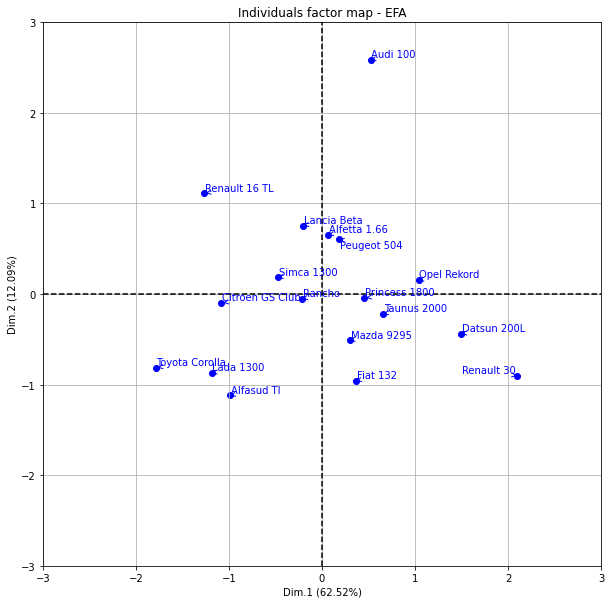

In [21]:
fig, axe = plt.subplots(figsize=(10,10))
plotEFA(my_efa,choice="ind",repel=True,xlim=(-3,3),ylim=(-3,3),ax=axe)

## Analyse de Harris

In [22]:
# Instanciation
my_efa2 = EFA(normalize=True,
            n_components=D.shape[1],
            row_labels=D.index,
            col_labels=D.columns,
            method="harris",
            row_sup_labels=None,
            quanti_sup_labels=None,
            quali_sup_labels=None,
            graph=False,
            figsize=None)
my_efa2.fit(D)

EFA(col_labels=Index(['CYL', 'PUISS', 'LONG', 'LARG', 'POIDS', 'VMAX', 'RND1', 'RND2', 'RND3',
       'RND4', 'RND5', 'RND6'],
      dtype='object'),
    graph=False, method='harris', n_components=12,
    row_labels=Index(['Alfasud TI', 'Audi 100', 'Simca 1300', 'Citroen GS Club', 'Fiat 132',
       'Lancia Beta', 'Peugeot 504', 'Renault 16 TL', 'Renault 30',
       'Toyota Corolla', 'Alfetta 1.66', 'Princess 1800', 'Datsun 200L',
       'Taunus 2000', 'Rancho', 'Mazda 9295', 'Opel Rekord', 'Lada 1300'],
      dtype='object', name='Modele'))

In [23]:
pd.DataFrame(my_efa2.eig_.T)

,0,1,2,3
0,48.363500,40.296952,76.052629,76.052629
1,8.066548,4.333778,12.684818,88.737447
2,3.732770,1.044507,5.869860,94.607306
3,2.688263,1.378686,4.227351,98.834657
4,1.309577,0.335533,2.059338,100.893995
5,0.974045,0.611522,1.531706,102.425701
6,0.362522,0.327260,0.570074,102.995775
7,0.035262,0.315022,0.055450,103.051225
8,-0.279760,0.094832,-0.439929,102.611297
9,-0.374592,0.209262,-0.589054,102.022243


In [24]:
summaryEFA(my_efa,to_markdown=True)

                     Exploratory Factor Analysis - Results                     

Importance of components
|                         |   Dim.1 |   Dim.2 |   Dim.3 |   Dim.4 |   Dim.5 |   Dim.6 |   Dim.7 |   Dim.8 |
|:------------------------|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|
| Variance                |   5.23  |   1.011 |   0.976 |   0.723 |   0.539 |   0.263 |   0.096 |   0.006 |
| Difference              |   4.218 |   0.036 |   0.252 |   0.185 |   0.275 |   0.168 |   0.09  |   0.05  |
| % of var.               |  62.521 |  12.093 |  11.664 |   8.647 |   6.439 |   3.149 |   1.146 |   0.071 |
| Cumulative of % of var. |  62.521 |  74.614 |  86.278 |  94.924 | 101.363 | 104.513 | 105.659 | 105.729 |

Individuals (the 10 first) - Coordonnées factorielles des 10 premiers ind.

| Modele          |   Dim.1 |   Dim.2 |   Dim.3 |
|:----------------|--------:|--------:|--------:|
| Alfasud TI      |  -0.986 |  -1.119 |   1.139 |
| Audi 100        |